# Wyznaczanie naturalnej funkcji sklejanej 3 stopnia

Mając funkcję $f$ oraz węzły $t_0 < t_1 < ... < t_n$ chcemy wyznaczyć funkcję sklejaną 3 stopnia. Wiemy, że dla każdego przedziału $[t_i, t_{i+1}]$ dana jest ona wzorem:
$$
   S_i(x) = \frac{S''(t_i)}{6(t_{i+1} - t_i)}(t_{i+1} - x)^3 + \frac{S''(t_{i+1})}{6(t_{i+1} - t_i)}(x - t_i)^3
   + (\frac{f(y_{i+1})}{(t_{i+1} - t_i)} - \frac{S''(t_{i+1})(t_{i+1} - t_i)}{6})(x - t_i)
   + (\frac{f(y_i)}{(t_{i+1} - t_i)} - \frac{S''(t_i)(t_{i+1} - t_i)}{6})(t_{i+1} - x)
$$

Znamy również sposób na wyznaczenie wartości $S''(t_i)$

In [1]:
using Plots
using Printf
using Polynomials
using QuadGK

In [2]:
f(x) = sin(x) + cos(x) * exp(1 / (25 + x^2)) + 1 / 10 * x^3
a = -4
b = 4
numberOfNodes = 5

5

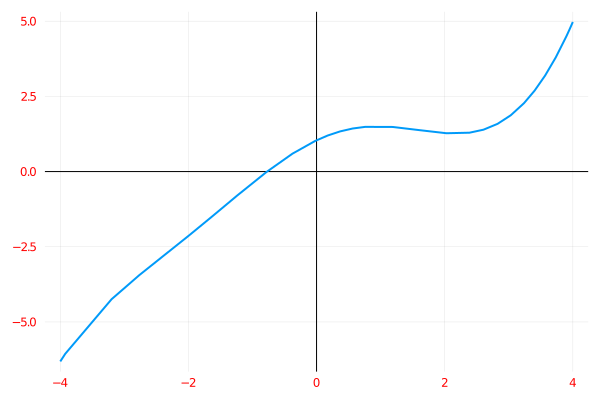

In [3]:
default(tickfont = (8, :red), framestyle = :zerolines)
plot(f, a, b, linewidth = 2, label = false)

### Funkcja wyznaczająca równo odległe węzły

In [4]:
function nodes(a, b, n) 
    t = zeros(n + 1)

    h = (b - a) / n

    for i = 0:n
        t[i + 1] = a + h * i
    end
    
    return t
end

nodes (generic function with 1 method)

In [5]:
nodes(a, b, numberOfNodes)

6-element Array{Float64,1}:
 -4.0
 -2.4
 -0.7999999999999998
  0.8000000000000007
  2.4000000000000004
  4.0

### Funkcja wyznaczająca wartości drugich pochodnych funkcji sklejanej

In [6]:
function secDerValues(f, a, b, n, t)
    h = (b - a) /  n
    
    u = zeros(n-1)
    b = zeros(n)
    v = zeros(n-1)
    lambdas = zeros(n + 1)
    lambdas[1] = 0
    lambdas[n+1] = 0

    for i=1:n
        b[i] = 6(f(t[i + 1]) - f(t[i])) / h
    end
    
    u[1] = 2 * (h + h) 
    v[1] = b[2] - b[1]
    
    for i = 2:n-1
        u[i] = 2 * (h + h) - h * h / u[i - 1]
        v[i] = b[i+1] - b[i] - h * v[i - 1] / u[i - 1]
    end
    
    for i = n:-1:2
        lambdas[i] = (v[i - 1] - h * lambdas[i + 1]) / u[i - 1]
    end

    return lambdas
end

secDerValues (generic function with 1 method)

### Funkcja zwracająca współczynniki i obliczone wartości w punktach funkcji sklejanej

In [7]:
function getSplineGraph(f, a, b, n) 
    h = (b - a) / n
    t = nodes(a, b, n)
    l = secDerValues(f, a, b, n, t)
    y = zeros(n + 1)
    coeff = zeros(n, 4)
    
    for i=1:n+1
        y[i] = f(t[i])
    end
    
    for i=1:n
        coeff[i, 1] = (-l[i] / (6*h) + l[i+1] / (6*h))
        coeff[i, 2] = (l[i] / (2*h) * t[i + 1] - l[i + 1] / (2 * h) * t[i])
        coeff[i, 3] = (-l[i] / (2 * h) * (t[i + 1])^2 + l[i + 1] / (2 * h) * (t[i])^2 + y[i + 1] / h - 
            l[i + 1] * h / 6 - y[i] / h + l[i] * h / 6)
        coeff[i, 4] = (l[i] / (6 * h) * (t[i+1])^3 - l[i + 1] / (6 * h) * (t[i])^3 - y[i+1] / h * t[i] + 
            l[i+1] * h / 6 * t[i] + y[i] / h * t[i + 1] - l[i] * h / 6 * t[i + 1])
    end

    return (coeff)
end

getSplineGraph (generic function with 1 method)

In [8]:
function getSplineValues(a, b, n, coeff, numberOfPoints = 100) 
    
    xs = LinRange(a, b, numberOfPoints * n)
    ys = zeros(numberOfPoints * n)
    
    for i=1:n 
        g(x) = coeff[i, 1] * x^3 + coeff[i, 2] * x^2 + coeff[i, 3] * x + coeff[i, 4]

        for j=1:numberOfPoints
            ys[(i - 1) * numberOfPoints + j] = g(xs[(i - 1) * numberOfPoints + j])
        end 
    end
    
    return xs, ys
end

getSplineValues (generic function with 2 methods)

In [9]:
coeff = getSplineGraph(f, a, b, numberOfNodes)
g = getSplineValues(a, b,  numberOfNodes, coeff)

(range(-4.0, stop=4.0, length=500), [-6.312979664303356, -6.276421205559975, -6.239863683586442, -6.203308035152606, -6.1667551970283165, -6.1302061059834205, -6.093661698787769, -6.057122912211208, -6.0205906830235865, -5.984065947994755  …  4.53962404040316, 4.5876667937320885, 4.6357647048930755, 4.683910879157088, 4.732098421795149, 4.780320438078247, 4.82857003327735, 4.876840312663488, 4.925124381507642, 4.973415345080786])

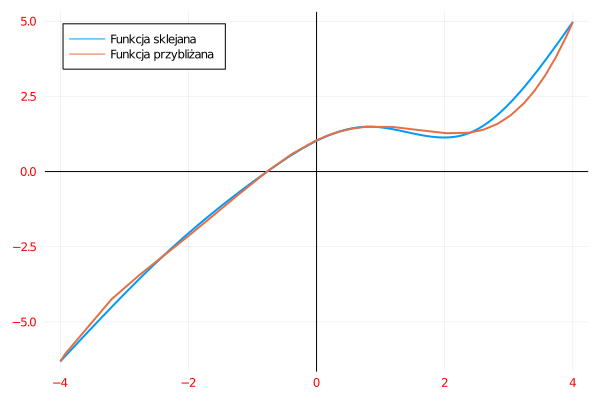

In [10]:
default(tickfont = (8, :red), framestyle = :zerolines)

plot(g[1], g[2], linewidth = 2, label = "Funkcja sklejana", legend = :topleft)
plot!(f, a, b, linewidth = 2, label = "Funkcja przybliżana")

### Funkcja wyznaczająca wartości całki z funkcji sklejanej na przedziale $(a, b)$

In [11]:
function integrateSpline(f, a, b, n, x)
    h = (b - a) / n
    t = nodes(a, b, n)
    
    coeff = getSplineGraph(f, a, b, n)
    
    lastIndex = 1
    
    while x >= t[lastIndex]
        lastIndex = lastIndex + 1
    end
    
    lastIndex = lastIndex - 1
    sum = 0
    
    for i=1:lastIndex
        g(x) = coeff[i, 1] * x^4 / 4 + coeff[i, 2] * x^3 / 3 + coeff[i, 3] * x^2 / 2 + coeff[i, 4] * x
        area = g(t[i+1]) - g(t[i])
        
        sum = sum + area
    end
    
    return sum
end

integrateSpline (generic function with 1 method)

In [12]:
integrateSpline(f, a, b, numberOfNodes, 2.4)

-5.906004264291065

In [13]:
quadgk(f, a, 2.4)

(-5.551765900510263, 5.6767035516713804e-11)

In [241]:
function compare(f, a, b, n, x)
    int = quadgk(f, a, x)
    intSpline = integrateSpline(f, a, b, n, x)
    
    @printf("Błąd bezwzględny dla x = %f i n = %f:\n", x, n)
    @printf("%d & %f & %f \\\\", n, intSpline, abs(int[1] - intSpline))
    return abs(int[1] - intSpline), intSpline
end

compare (generic function with 1 method)

In [242]:
compare(f, a, b, numberOfNodes, 2.4)

Błąd bezwzględny dla x = 2.400000 i n = 2.000000:
2 & -4.337803 & 0.249404 \\

(0.2494037731042189, -4.33780255388625)

# Testy numeryczne

Funkcja rysująca wykres funkcji sklejanej

In [472]:
function drawSpline(f, a, b, n)
    coeff = getSplineGraph(f, a, b, n)
    g = getSplineValues(a, b, n, coeff)

    default(tickfont = (8, :red), framestyle = :zerolines)

    plot(g[1], g[2], linewidth = 2, label = "Funkcja sklejana", legend = :bottomright)
    plot!(f, a, b, linewidth = 2, label = "Funkcja przybliżana") 
end

drawSpline (generic function with 1 method)

# Test 1

In [244]:
f(x) = 5 * sin(x) + 1/10 * x^2 + 10 * 5 * cos(x) + log(x + 5)
a = 0
b = 4
numberOfNodes = 2
x = 2.4
quadgk(f, a, x)

(47.284690044648194, 7.247535904753022e-13)

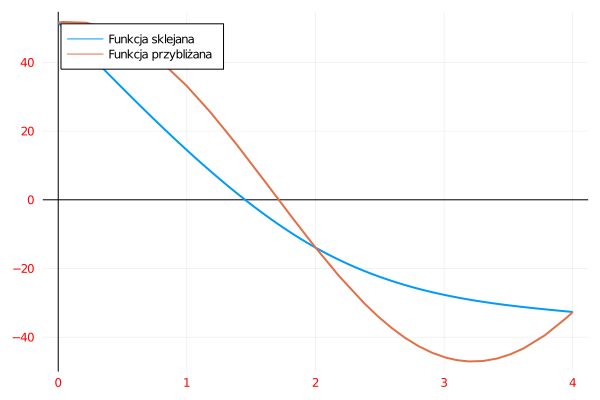

In [245]:
drawSpline(f, a, b, 2)

In [246]:
compare(f, a, b, 2, x)

Błąd bezwzględny dla x = 2.400000 i n = 2.000000:
2 & -20.582010 & 67.866700 \\

(67.86669967754412, -20.582009632895932)

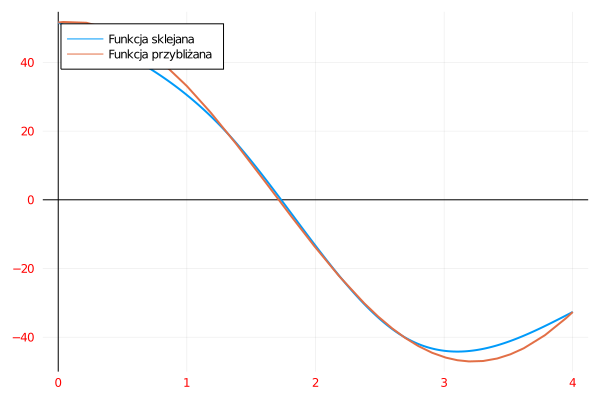

In [247]:
drawSpline(f, a, b, 3)

In [248]:
compare(f, a, b, 3, x)

Błąd bezwzględny dla x = 2.400000 i n = 3.000000:
3 & 34.003204 & 13.281486 \\

(13.281485833260263, 34.00320421138793)

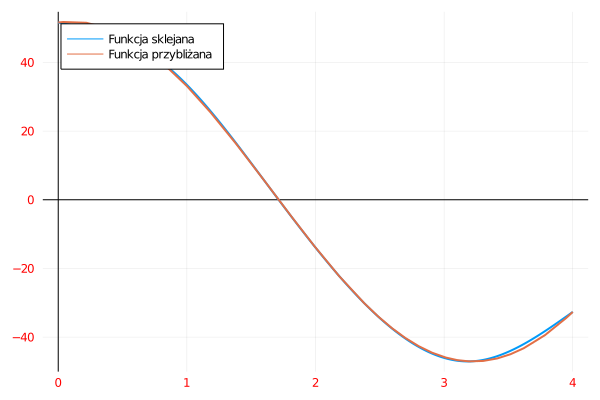

In [249]:
drawSpline(f, a, b, 5)

In [250]:
compare(f, a, b, 5, x)

Błąd bezwzględny dla x = 2.400000 i n = 5.000000:
5 & 46.630223 & 0.654467 \\

(0.6544674988176027, 46.63022254583059)

In [251]:
compare(f, a, b, 10, x)

Błąd bezwzględny dla x = 2.400000 i n = 10.000000:
10 & 47.205651 & 0.079039 \\

(0.0790391009644793, 47.205650943683715)

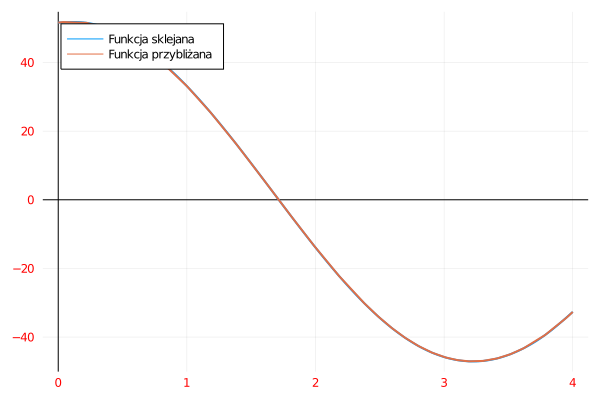

In [252]:
drawSpline(f, a, b, 20)

In [253]:
compare(f, a, b, 20, x)

Błąd bezwzględny dla x = 2.400000 i n = 20.000000:
20 & 47.274971 & 0.009719 \\

(0.009719320044169422, 47.274970724604024)

In [254]:
compare(f, a, b, 130, x)

Błąd bezwzględny dla x = 2.400000 i n = 130.000000:
130 & 47.284655 & 0.000035 \\

(3.498220805653318e-5, 47.28465506244014)

# Test 2

In [255]:
f(x) = sin(5x) + exp(1/5 * x) - 3
a = 0
b = 5
x = 3
quadgk(f, a, x)

(-4.537468415475691, 1.0756284751778367e-11)

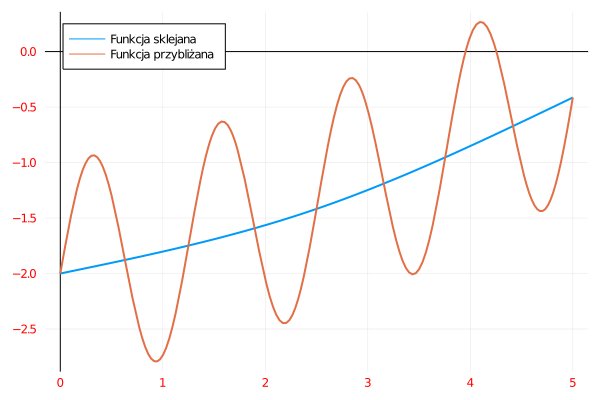

In [256]:
drawSpline(f, a, b, 2)

In [257]:
compare(f, a, b, 2, x)

Błąd bezwzględny dla x = 3.000000 i n = 2.000000:
2 & -6.693193 & 2.155724 \\

(2.155724094345218, -6.693192509820909)

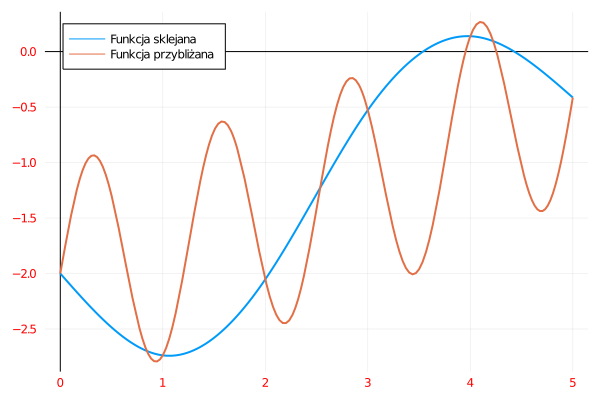

In [258]:
drawSpline(f, a, b, 5)

In [259]:
compare(f, a, b, 5, x)

Błąd bezwzględny dla x = 3.000000 i n = 5.000000:
5 & -6.331958 & 1.794490 \\

(1.7944895411775095, -6.3319579566532)

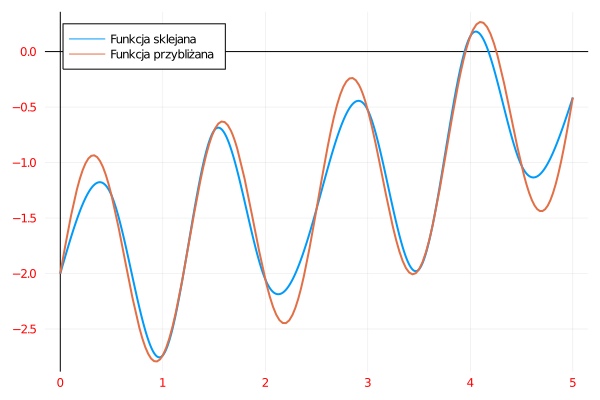

In [260]:
drawSpline(f, a, b, 10)

In [261]:
compare(f, a, b, 10, x)

Błąd bezwzględny dla x = 3.000000 i n = 10.000000:
10 & -5.317852 & 0.780384 \\

(0.7803839342014198, -5.317852349677111)

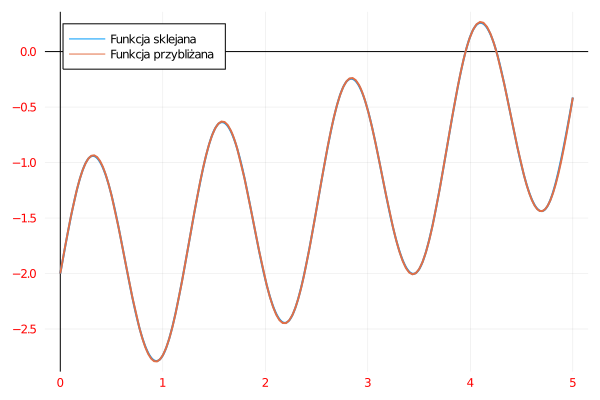

In [262]:
drawSpline(f, a, b, 20)

In [263]:
compare(f, a, b, 20, x)

Błąd bezwzględny dla x = 3.000000 i n = 20.000000:
20 & -4.803045 & 0.265577 \\

(0.26557703859890935, -4.8030454540746)

In [264]:
compare(f, a, b, 50, x)

Błąd bezwzględny dla x = 3.000000 i n = 50.000000:
50 & -4.609706 & 0.072237 \\

(0.07223722412864841, -4.609705639604339)

In [265]:
compare(f, a, b, 100, x)

Błąd bezwzględny dla x = 3.000000 i n = 100.000000:
100 & -4.568454 & 0.030986 \\

(0.03098560665172556, -4.568454022127416)

In [266]:
compare(f, a, b, 250, x)

Błąd bezwzględny dla x = 3.000000 i n = 250.000000:
250 & -4.548728 & 0.011260 \\

(0.011259648698301206, -4.548728064173992)

In [267]:
compare(f, a, b, 1000, x)

Błąd bezwzględny dla x = 3.000000 i n = 1000.000000:
1000 & -4.540150 & 0.002681 \\

(0.0026812267549560787, -4.540149642230647)

In [268]:
compare(f, a, b, 50000, x)

Błąd bezwzględny dla x = 3.000000 i n = 50000.000000:
50000 & -4.537521 & 0.000053 \\

(5.277651261170746e-5, -4.5375211919883025)

# Test 3

In [299]:
f(x) = 1 / (1 + 25 * x^2)
a = -2
b = 2
x = 1.5
quadgk(f, a, x)

(0.5818744937603915, 1.4726080493909777e-9)

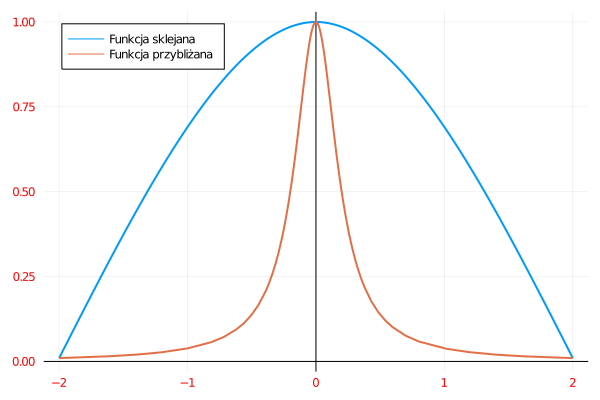

In [304]:
drawSpline(f, a, b, 2)

In [303]:
compare(f, a, b, 2, x)

Błąd bezwzględny dla x = 1.500000 i n = 2.000000:
2 & 2.514851 & 1.932977 \\

(1.9329769913881234, 2.514851485148515)

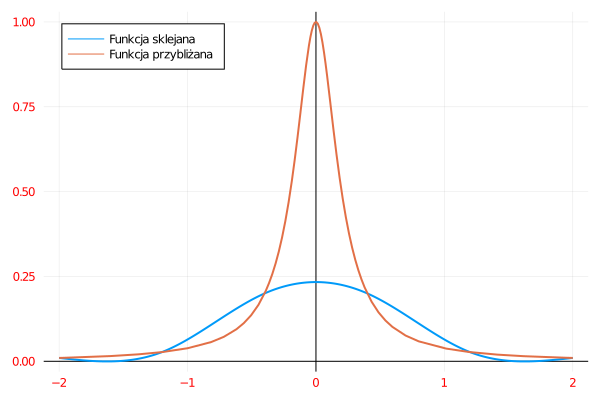

In [308]:
drawSpline(f, a, b, 5)

In [309]:
compare(f, a, b, 5, x)

Błąd bezwzględny dla x = 1.500000 i n = 5.000000:
5 & 0.366765 & 0.215109 \\

(0.21510914581734675, 0.3667653479430447)

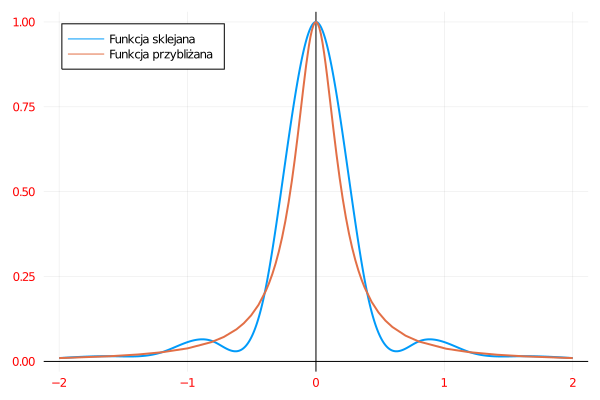

In [312]:
drawSpline(f, a, b, 10)

In [313]:
compare(f, a, b, 10, x)

Błąd bezwzględny dla x = 1.500000 i n = 10.000000:
10 & 0.640139 & 0.058265 \\

(0.05826475964882594, 0.6401392534092174)

In [318]:
compare(f, a, b, 15, x)

Błąd bezwzględny dla x = 1.500000 i n = 15.000000:
15 & 0.574224 & 0.007651 \\

(0.007650576115124208, 0.5742239176452673)

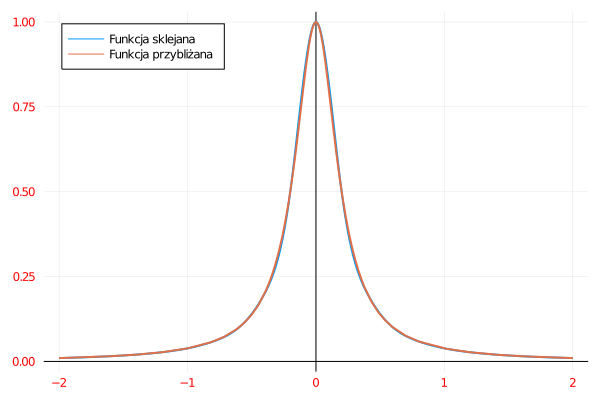

In [319]:
drawSpline(f, a, b, 20)

In [320]:
compare(f, a, b, 20, x)

Błąd bezwzględny dla x = 1.500000 i n = 20.000000:
20 & 0.585868 & 0.003993 \\

(0.003993455710929794, 0.5858679494713213)

In [321]:
compare(f, a, b, 40, x)

Błąd bezwzględny dla x = 1.500000 i n = 40.000000:
40 & 0.583519 & 0.001644 \\

(0.0016440545268961992, 0.5835185482872877)

In [322]:
compare(f, a, b, 100, x)

Błąd bezwzględny dla x = 1.500000 i n = 100.000000:
100 & 0.582219 & 0.000345 \\

(0.00034485005470497043, 0.5822193438150964)

In [323]:
compare(f, a, b, 200, x)

Błąd bezwzględny dla x = 1.500000 i n = 200.000000:
200 & 0.582219 & 0.000345 \\

(0.00034483006700603003, 0.5822193238273975)

In [324]:
compare(f, a, b, 1000, x)

Błąd bezwzględny dla x = 1.500000 i n = 1000.000000:
1000 & 0.581944 & 0.000070 \\

(6.968643072158276e-5, 0.581944180191113)

# Test 4

In [370]:
f(x) = 1 / 1000 * x^5 - 1 / 32 * x^3 + 2 / 13 * x

a = 0
b = 2
x = 1.3
quadgk(f, a, x)

(0.10849118691666668, 1.3877787807814457e-17)

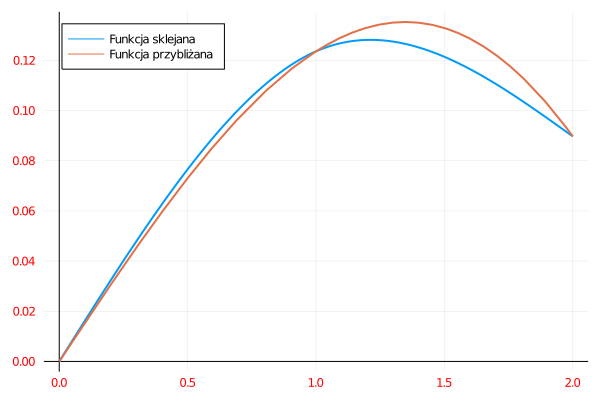

In [377]:
drawSpline(f, a, b, 2)

In [375]:
compare(f, a, b, 2, x)

Błąd bezwzględny dla x = 1.300000 i n = 2.000000:
2 & 0.188130 & 0.079639 \\

(0.07963862077564113, 0.1881298076923078)

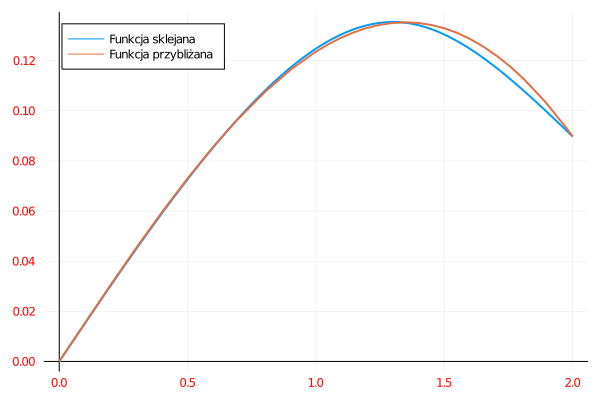

In [380]:
drawSpline(f, a, b, 3)

In [381]:
compare(f, a, b, 3, x)

Błąd bezwzględny dla x = 1.300000 i n = 3.000000:
3 & 0.113336 & 0.004845 \\

(0.0048453119753877755, 0.11333649889205445)

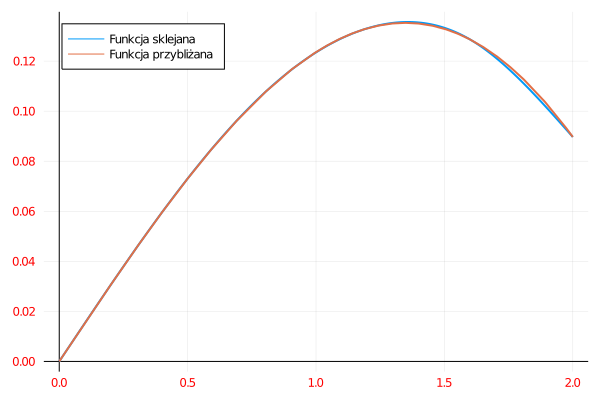

In [384]:
drawSpline(f, a, b, 5)

In [386]:
compare(f, a, b, 5, x)

Błąd bezwzględny dla x = 1.300000 i n = 5.000000:
5 & 0.148603 & 0.040112 \\

(0.040111720972917486, 0.14860290788958416)

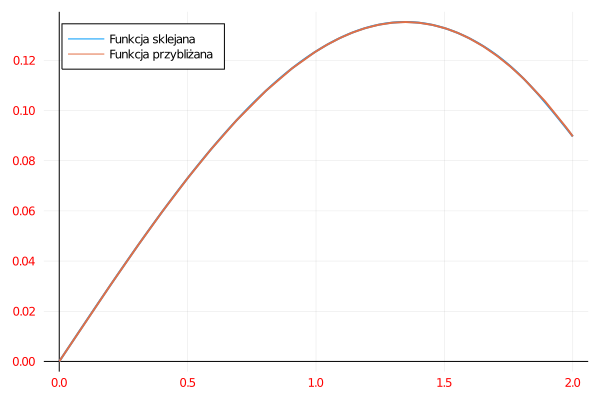

In [389]:
drawSpline(f, a, b, 10)

In [391]:
compare(f, a, b, 10, x)

Błąd bezwzględny dla x = 1.300000 i n = 10.000000:
10 & 0.122012 & 0.013521 \\

(0.013521004307823409, 0.12201219122449009)

In [392]:
compare(f, a, b, 20, x)

Błąd bezwzględny dla x = 1.300000 i n = 20.000000:
20 & 0.122012 & 0.013520 \\

(0.013520448269943322, 0.12201163518661)

In [393]:
compare(f, a, b, 50, x)

Błąd bezwzględny dla x = 1.300000 i n = 50.000000:
50 & 0.111194 & 0.002703 \\

(0.002702804075894613, 0.11119399099256129)

In [394]:
compare(f, a, b, 100, x)

Błąd bezwzględny dla x = 1.300000 i n = 100.000000:
100 & 0.111194 & 0.002703 \\

(0.0027028044243745802, 0.11119399134104126)

In [395]:
compare(f, a, b, 1000, x)

Błąd bezwzględny dla x = 1.300000 i n = 1000.000000:
1000 & 0.108761 & 0.000270 \\

(0.00027013247183496625, 0.10876131938850164)

In [396]:
compare(f, a, b, 10000, x)

Błąd bezwzględny dla x = 1.300000 i n = 10000.000000:
10000 & 0.108518 & 0.000027 \\

(2.701152951829766e-5, 0.10851819844618497)

# Test 5

In [424]:
f(x) = -(sin(x) + 1 / (250 * x^2))

a = 0.05
b = 2
x = 1.7
quadgk(f, a, x)

(-1.2052418135140226, 1.4226717907905861e-8)

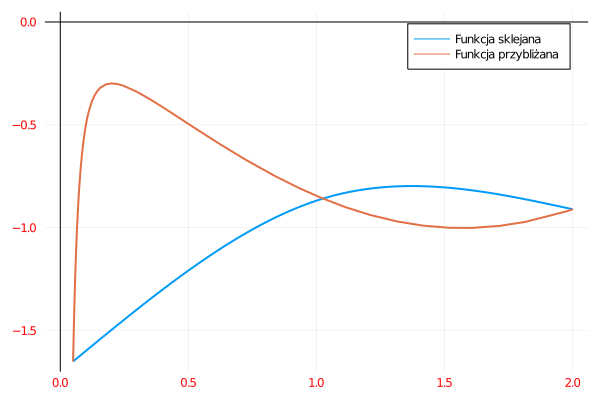

In [456]:
drawSpline(f, a, b, 2)

In [421]:
compare(f, a, b, 2, x)

Błąd bezwzględny dla x = 1.700000 i n = 2.000000:
2 & -1.982424 & 0.777182 \\

(0.7771823305366998, -1.9824241440507224)

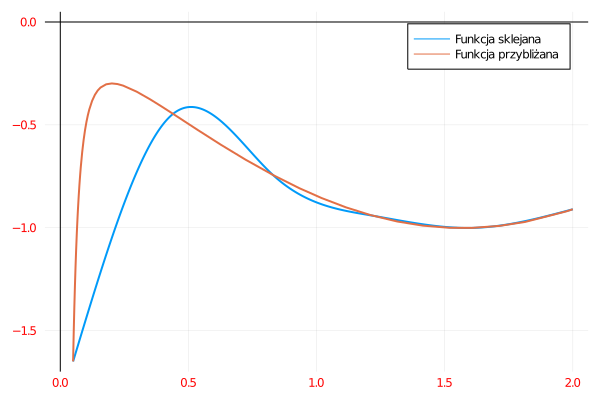

In [458]:
drawSpline(f, a, b, 5)

In [439]:
compare(f, a, b, 5, x)

Błąd bezwzględny dla x = 1.700000 i n = 5.000000:
5 & -1.672953 & 0.467711 \\

(0.4677114154377622, -1.6729532289517848)

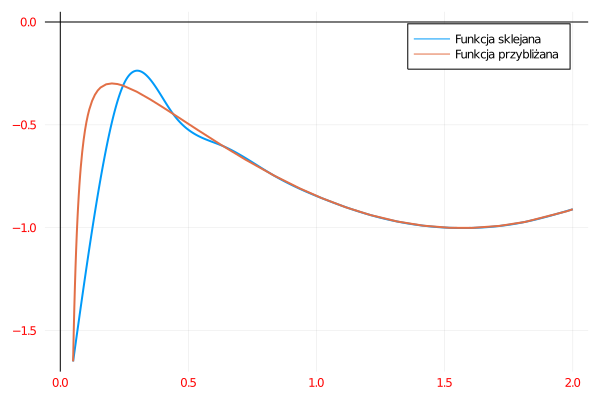

In [460]:
drawSpline(f, a, b, 10)

In [440]:
compare(f, a, b, 10, x)

Błąd bezwzględny dla x = 1.700000 i n = 10.000000:
10 & -1.377668 & 0.172426 \\

(0.17242617011087424, -1.3776679836248968)

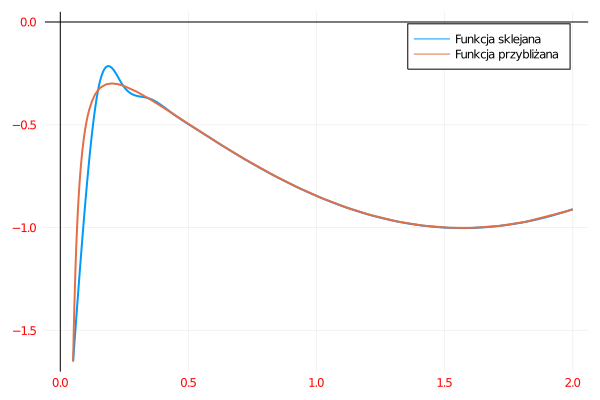

In [462]:
drawSpline(f, a, b, 20)

In [441]:
compare(f, a, b, 20, x)

Błąd bezwzględny dla x = 1.700000 i n = 20.000000:
20 & -1.234317 & 0.029076 \\

(0.02907550051729446, -1.234317314031317)

In [442]:
compare(f, a, b, 50, x)

Błąd bezwzględny dla x = 1.700000 i n = 50.000000:
50 & -1.235133 & 0.029891 \\

(0.029890984875763804, -1.2351327983897864)

In [443]:
compare(f, a, b, 100, x)

Błąd bezwzględny dla x = 1.700000 i n = 100.000000:
100 & -1.213225 & 0.007983 \\

(0.007982838030848427, -1.213224651544871)

In [444]:
compare(f, a, b, 1000, x)

Błąd bezwzględny dla x = 1.700000 i n = 1000.000000:
1000 & -1.206881 & 0.001639 \\

(0.0016390294735304511, -1.206880842987553)

In [445]:
compare(f, a, b, 10000, x)

Błąd bezwzględny dla x = 1.700000 i n = 10000.000000:
10000 & -1.205331 & 0.000089 \\

(8.937455617785695e-5, -1.2053311880702005)

# Test 6

In [475]:
f(x) = sin(1 / (log(1 + x^2)))

a = 0.25
b = 1
x = 0.9
quadgk(f, a, x)

(0.11994153632149726, 8.313099653101119e-10)

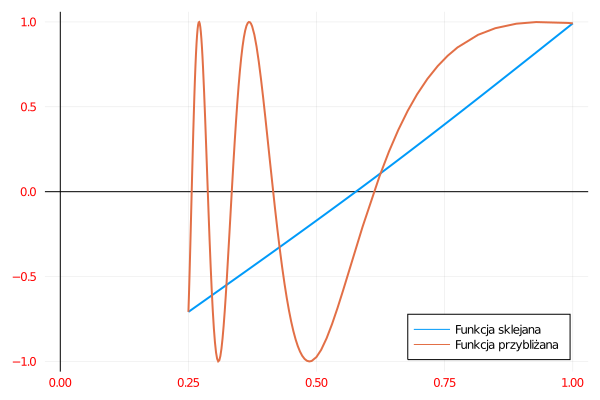

In [500]:
drawSpline(f, a, b, 2)

In [477]:
compare(f, a, b, 2, x)

Błąd bezwzględny dla x = 0.900000 i n = 2.000000:
2 & 0.090881 & 0.029060 \\

(0.029060254220461462, 0.0908812821010358)

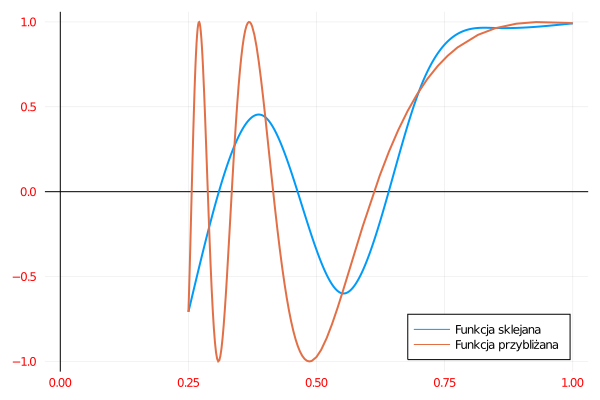

In [502]:
drawSpline(f, a, b, 5)

In [483]:
compare(f, a, b, 5, x)

Błąd bezwzględny dla x = 0.900000 i n = 5.000000:
5 & 0.253998 & 0.134057 \\

(0.13405671299212682, 0.2539982493136241)

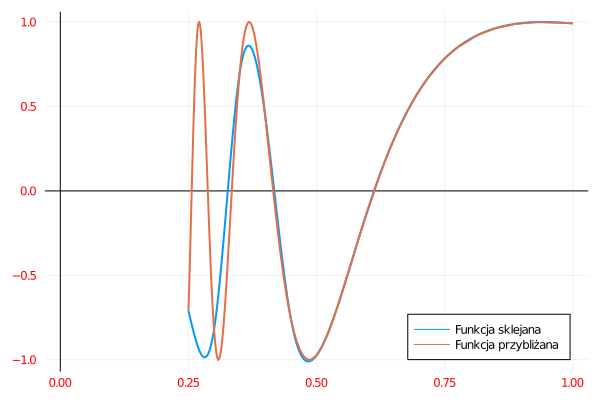

In [504]:
drawSpline(f, a, b, 15)

In [489]:
compare(f, a, b, 15, x)

Błąd bezwzględny dla x = 0.900000 i n = 15.000000:
15 & 0.124974 & 0.005032 \\

(0.005032093441340396, 0.12497362976283766)

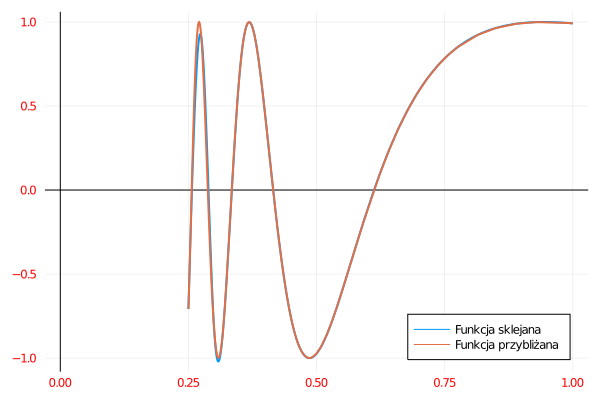

In [506]:
drawSpline(f, a, b, 30)

In [493]:
compare(f, a, b, 30, x)

Błąd bezwzględny dla x = 0.900000 i n = 30.000000:
30 & 0.144286 & 0.024344 \\

(0.024344281443888144, 0.1442858177653854)

In [494]:
compare(f, a, b, 50, x)

Błąd bezwzględny dla x = 0.900000 i n = 50.000000:
50 & 0.130445 & 0.010504 \\

(0.010503907158194964, 0.13044544347969222)

In [495]:
compare(f, a, b, 100, x)

Błąd bezwzględny dla x = 0.900000 i n = 100.000000:
100 & 0.122524 & 0.002582 \\

(0.002582445574976361, 0.12252398189647362)

In [496]:
compare(f, a, b, 250, x)

Błąd bezwzględny dla x = 0.900000 i n = 250.000000:
250 & 0.120942 & 0.001000 \\

(0.0010002431070637308, 0.12094177942856099)

In [497]:
compare(f, a, b, 1000, x)

Błąd bezwzględny dla x = 0.900000 i n = 1000.000000:
1000 & 0.120190 & 0.000248 \\

(0.0002484758150944899, 0.12019001213659175)

In [498]:
compare(f, a, b, 10000, x)

Błąd bezwzględny dla x = 0.900000 i n = 10000.000000:
10000 & 0.119966 & 0.000025 \\

(2.4836163989433446e-5, 0.1199663724854867)

# Test 7

In [509]:
f(x) = abs(sin(x)) - exp(-x^100)

a = -pi
b = pi
x = 0
quadgk(f, a, x)

(1.0056741488084917, 1.1745376659981488e-8)

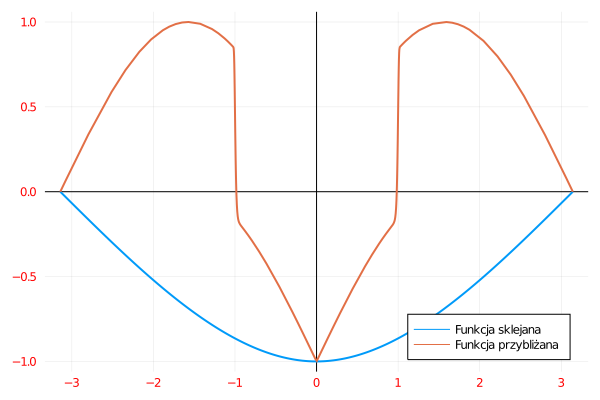

In [532]:
drawSpline(f, a, b, 2)

In [511]:
compare(f, a, b, 2, x)

Błąd bezwzględny dla x = 0.000000 i n = 2.000000:
2 & -3.926991 & 4.932665 \\

(4.932664965795732, -3.926990816987241)

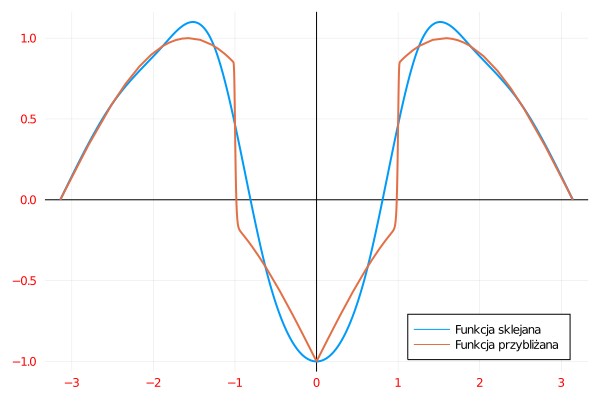

In [534]:
drawSpline(f, a, b, 10)

In [517]:
compare(f, a, b, 10, x)

Błąd bezwzględny dla x = 0.000000 i n = 10.000000:
10 & 0.515500 & 0.490174 \\

(0.49017416909685196, 0.5154999797116397)

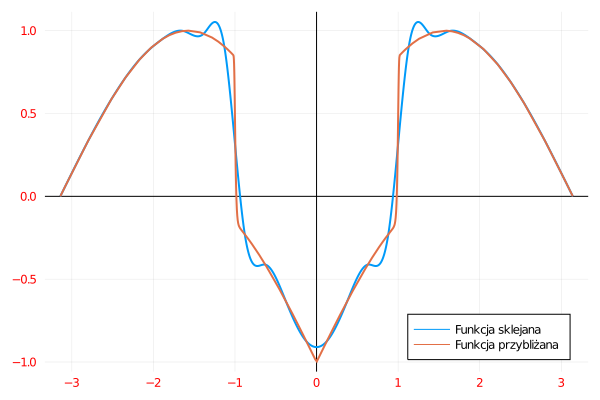

In [536]:
drawSpline(f, a, b, 25)

In [521]:
compare(f, a, b, 25, x)

Błąd bezwzględny dla x = 0.000000 i n = 25.000000:
25 & 0.884451 & 0.121223 \\

(0.12122294436189196, 0.8844512044465997)

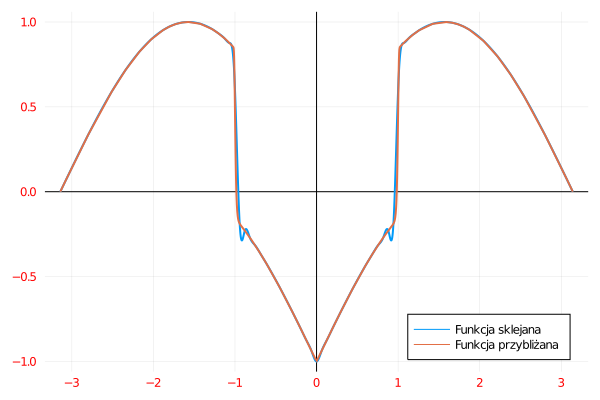

In [538]:
drawSpline(f, a, b, 100)

In [523]:
compare(f, a, b, 100, x)

Błąd bezwzględny dla x = 0.000000 i n = 100.000000:
100 & 1.014446 & 0.008772 \\

(0.008771845217259155, 1.0144459940257509)

In [526]:
compare(f, a, b, 200, x)

Błąd bezwzględny dla x = 0.000000 i n = 200.000000:
200 & 1.006806 & 0.001132 \\

(0.0011318240768163346, 1.006805972885308)

In [529]:
compare(f, a, b, 400, x)

Błąd bezwzględny dla x = 0.000000 i n = 400.000000:
400 & 1.005646 & 0.000028 \\

(2.8403232847917792e-5, 1.0056457455756438)

In [530]:
compare(f, a, b, 10000, x)

Błąd bezwzględny dla x = 0.000000 i n = 10000.000000:
10000 & 1.005046 & 0.000628 \\

(0.0006281957574201247, 1.0050459530510716)